In [5]:
# pip install kagglehub

## Download dataset

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("orvile/airline-market-fare-prediction-data")

print("Path to dataset files:", path)

Path to dataset files: /home/maria/.cache/kagglehub/datasets/orvile/airline-market-fare-prediction-data/versions/1


## Import libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pprint as pp
import seaborn as sns

## Read data

In [8]:
path_file = path + '/Airline_Market_Fare_Prediction_Data/MarketFarePredictionData.csv'
df = pd.read_csv(path_file)
df.head()

,MktCoupons,OriginCityMarketID,DestCityMarketID,OriginAirportID,DestAirportID,Carrier,NonStopMiles,RoundTrip,ODPairID,Pax,...,Circuity,Slot,Non_Stop,MktMilesFlown,OriginCityMarketID_freq,DestCityMarketID_freq,OriginAirportID_freq,DestAirportID_freq,Carrier_freq,ODPairID_freq
0,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.367460,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,0.000132
1,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.051724,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,0.000132
2,2,178,152,170,260,6,1784.0,0.0,4035,136.0,...,1.034753,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.009366,0.116826,0.000132
3,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.029884,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,0.000132
4,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.062291,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,0.000132


In [21]:
df.columns

Index(['MktCoupons', 'OriginCityMarketID', 'DestCityMarketID',
       'OriginAirportID', 'DestAirportID', 'Carrier', 'NonStopMiles',
       'RoundTrip', 'ODPairID', 'Pax', 'CarrierPax', 'Average_Fare',
       'Market_share', 'Market_HHI', 'LCC_Comp', 'Multi_Airport', 'Circuity',
       'Slot', 'Non_Stop', 'MktMilesFlown', 'OriginCityMarketID_freq',
       'DestCityMarketID_freq', 'OriginAirportID_freq', 'DestAirportID_freq',
       'Carrier_freq', 'ODPairID_freq'],
      dtype='object')

In [9]:
print('Variables names:', list(df.columns))

Variables names: ['MktCoupons', 'OriginCityMarketID', 'DestCityMarketID', 'OriginAirportID', 'DestAirportID', 'Carrier', 'NonStopMiles', 'RoundTrip', 'ODPairID', 'Pax', 'CarrierPax', 'Average_Fare', 'Market_share', 'Market_HHI', 'LCC_Comp', 'Multi_Airport', 'Circuity', 'Slot', 'Non_Stop', 'MktMilesFlown', 'OriginCityMarketID_freq', 'DestCityMarketID_freq', 'OriginAirportID_freq', 'DestAirportID_freq', 'Carrier_freq', 'ODPairID_freq']


# Exploring dataset

In [33]:
id_like_cols = [
    'OriginCityMarketID', 'DestCityMarketID',
    'OriginAirportID', 'DestAirportID',
    'ODPairID', 'OriginCityMarketID_freq',
    'DestCityMarketID_freq', 'OriginAirportID_freq',
    'DestAirportID_freq', 'Carrier_freq', 'ODPairID_freq'
]

numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in id_like_cols]

pseudo_categorical_cols = [col for col in numeric_cols if df[col].nunique() <= 10]

true_numeric_cols = [col for col in numeric_cols if col not in pseudo_categorical_cols]

print(f"Number of rows: {df.shape[0]}, number of columns: {df.shape[1]}")

print("\nTrue numeric columns (excluding IDs and categories):")
print(true_numeric_cols)

print("\nDescriptive statistics for true numeric variables:")
display(df[true_numeric_cols].describe())

print("\nPseudo-categorical variables (numeric type, few unique values):")
for col in pseudo_categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values -> {sorted(df[col].unique())}")

print("\nMissing values (percentage):")
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))



Number of rows: 1581278, number of columns: 26

True numeric columns (excluding IDs and categories):
['Carrier', 'NonStopMiles', 'Pax', 'CarrierPax', 'Average_Fare', 'Market_share', 'Market_HHI', 'Circuity', 'MktMilesFlown']

Descriptive statistics for true numeric variables:


,Carrier,NonStopMiles,Pax,CarrierPax,Average_Fare,Market_share,Market_HHI,Circuity,MktMilesFlown
count,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06
mean,1.277755e+01,1.183158e+03,1.773202e+05,6.299279e+04,2.144831e+02,4.872004e-01,5.012627e+03,1.026428e+00,1.213717e+03
std,7.785476e+00,7.136535e+02,2.380289e+05,8.802554e+04,7.337322e+01,2.977998e-01,2.494343e+03,1.091917e-01,7.268271e+02
min,0.000000e+00,1.000000e+02,1.000000e+00,1.000000e+00,6.739000e+01,5.001139e-02,1.553420e+03,1.000000e+00,1.020000e+02
25%,4.000000e+00,6.430000e+02,3.182400e+04,1.305200e+04,1.669400e+02,2.367379e-01,3.057060e+03,1.000000e+00,6.580258e+02
50%,1.500000e+01,1.011000e+03,8.654300e+04,3.106800e+04,2.022700e+02,4.273371e-01,4.269820e+03,1.000000e+00,1.040641e+03
75%,2.000000e+01,1.590000e+03,2.318210e+05,7.597000e+04,2.466400e+02,7.170709e-01,6.339910e+03,1.000000e+00,1.639106e+03
max,2.400000e+01,5.095000e+03,1.495396e+06,7.068350e+05,1.265990e+03,1.000000e+00,1.000000e+04,2.985825e+00,5.096521e+03



Pseudo-categorical variables (numeric type, few unique values):
MktCoupons: 3 unique values -> [1, 2, 3]
RoundTrip: 2 unique values -> [0.0, 1.0]
LCC_Comp: 2 unique values -> [0, 1]
Multi_Airport: 2 unique values -> [0, 1]
Slot: 2 unique values -> [0, 1]
Non_Stop: 2 unique values -> [0.0, 1.0]

Missing values (percentage):
Series([], dtype: float64)


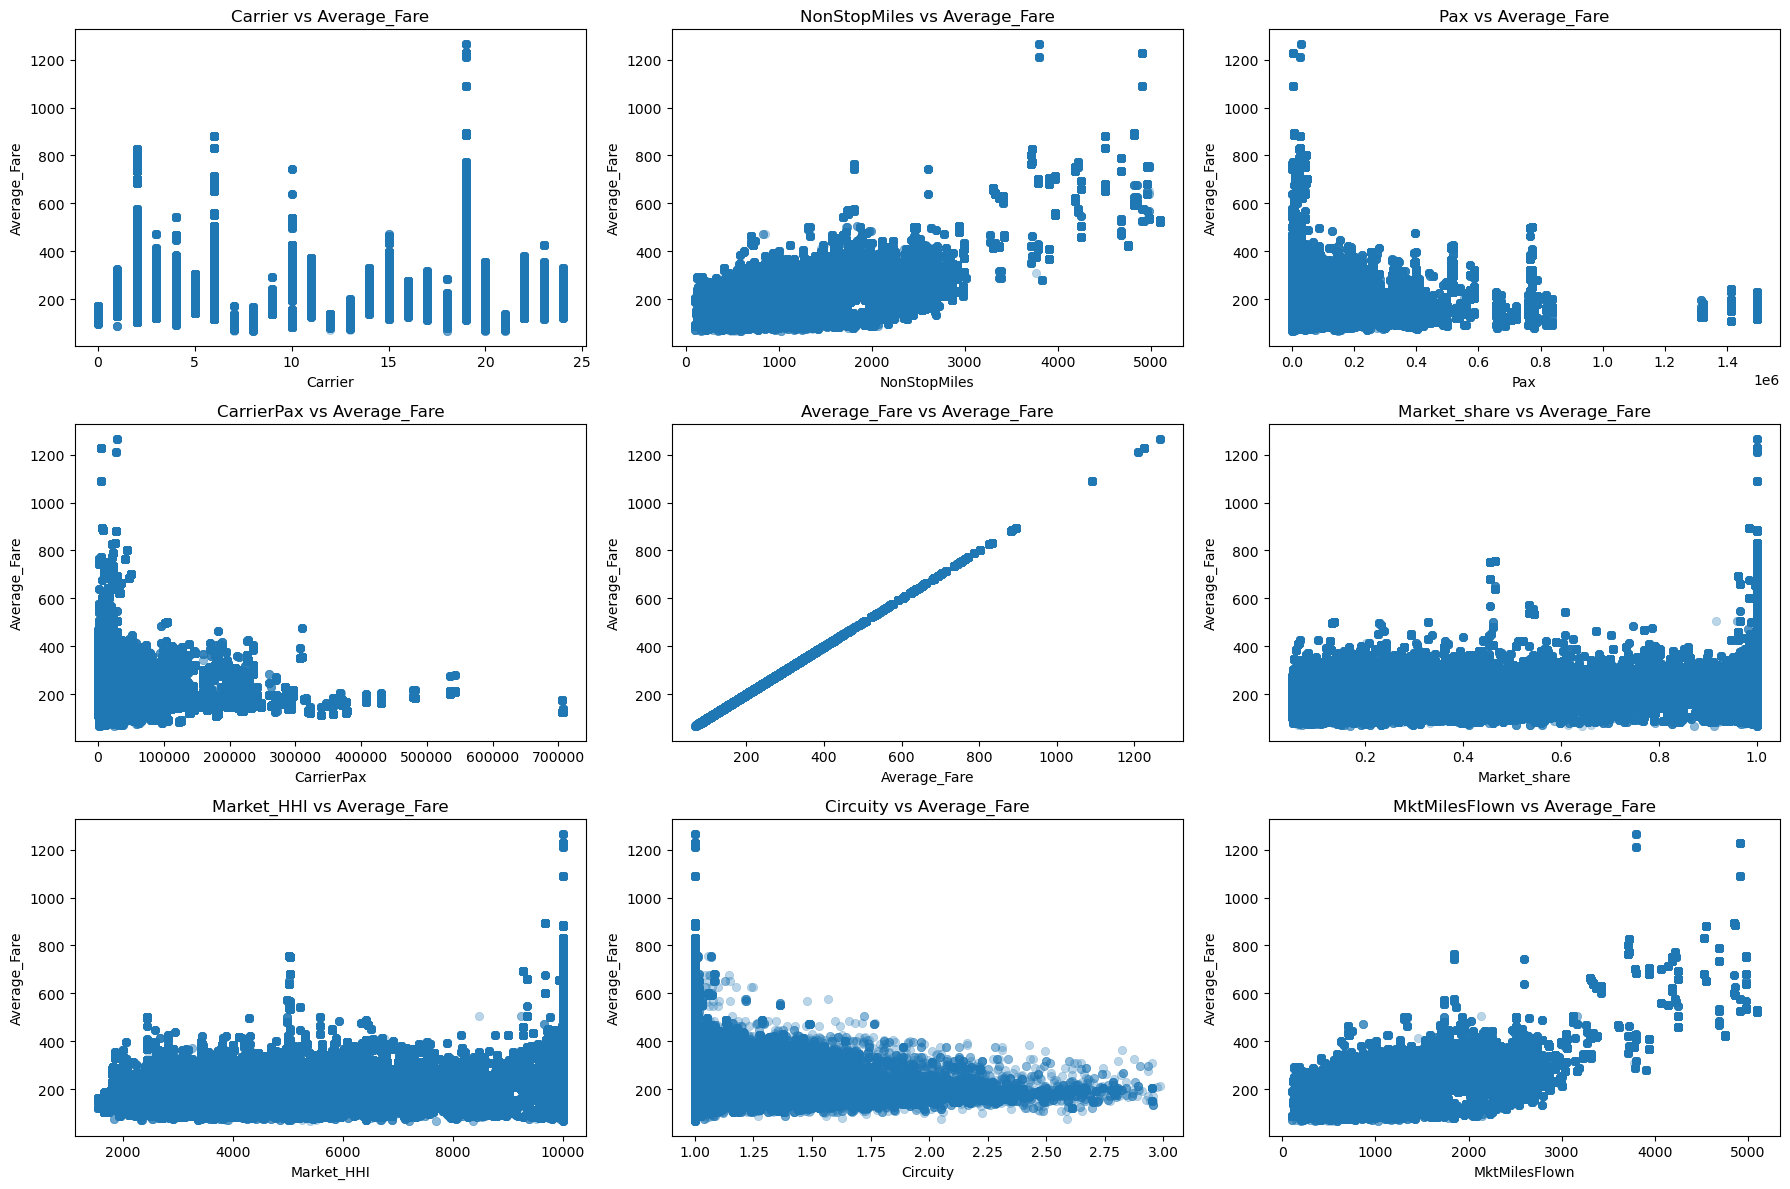

In [34]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(true_numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(data=df, x=true_numeric_cols[i], y='Average_Fare', alpha=0.3, edgecolor=None)
    plt.title(f"{col} vs Average_Fare")
    plt.xlabel(col)
    plt.ylabel("Average_Fare")

plt.tight_layout()
plt.show()



Correlation matrix:
                 Carrier  NonStopMiles       Pax  CarrierPax  Average_Fare  \
Carrier        1.000000     -0.164421 -0.090373   -0.154593     -0.162466   
NonStopMiles  -0.164421      1.000000 -0.038803   -0.060035      0.734829   
Pax           -0.090373     -0.038803  1.000000    0.790826     -0.161839   
CarrierPax    -0.154593     -0.060035  0.790826    1.000000     -0.104272   
Average_Fare  -0.162466      0.734829 -0.161839   -0.104272      1.000000   
Market_share  -0.085741      0.065079 -0.330080    0.009557      0.241951   
Market_HHI    -0.030611      0.089730 -0.415994   -0.215173      0.252886   
Circuity       0.079324     -0.009104 -0.061556   -0.057919      0.035153   
MktMilesFlown -0.154774      0.998268 -0.048107   -0.067977      0.734633   

               Market_share  Market_HHI  Circuity  MktMilesFlown  
Carrier           -0.085741   -0.030611  0.079324      -0.154774  
NonStopMiles       0.065079    0.089730 -0.009104       0.998268  
Pax    

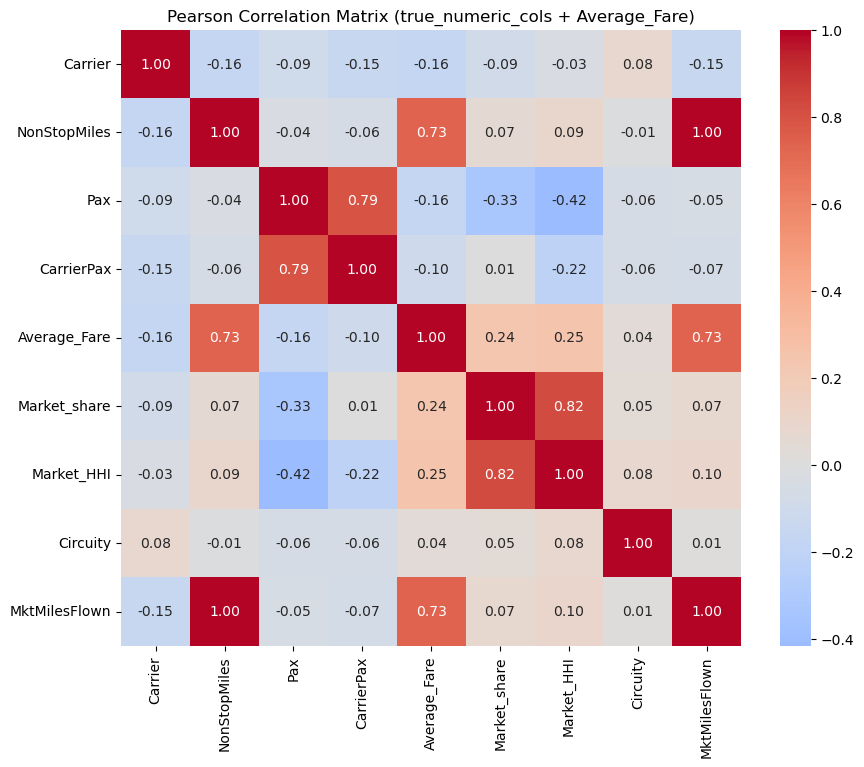


Correlations with Average_Fare:
Average_Fare     1.000000
NonStopMiles     0.734829
MktMilesFlown    0.734633
Market_HHI       0.252886
Market_share     0.241951
Circuity         0.035153
CarrierPax      -0.104272
Pax             -0.161839
Carrier         -0.162466
Name: Average_Fare, dtype: float64


In [36]:
corr_matrix = df[true_numeric_cols].corr()

print("Correlation matrix:\n", corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Pearson Correlation Matrix (true_numeric_cols + Average_Fare)")
plt.show()

print("\nCorrelations with Average_Fare:")
print(corr_matrix['Average_Fare'].sort_values(ascending=False))


Pearson correlation matrix for pseudo-categorical variables with Average_Fare:
                MktCoupons  RoundTrip  LCC_Comp  Multi_Airport      Slot  \
MktCoupons       1.000000  -0.065686  0.087032      -0.048022 -0.062560   
RoundTrip       -0.065686   1.000000 -0.017668      -0.044734 -0.057062   
LCC_Comp         0.087032  -0.017668  1.000000       0.210250  0.056354   
Multi_Airport   -0.048022  -0.044734  0.210250       1.000000  0.244062   
Slot            -0.062560  -0.057062  0.056354       0.244062  1.000000   
Non_Stop        -0.994965   0.067310 -0.087569       0.049704  0.063307   
Average_Fare     0.216857  -0.018065 -0.172588       0.002331  0.004737   

               Non_Stop  Average_Fare  
MktCoupons    -0.994965      0.216857  
RoundTrip      0.067310     -0.018065  
LCC_Comp      -0.087569     -0.172588  
Multi_Airport  0.049704      0.002331  
Slot           0.063307      0.004737  
Non_Stop       1.000000     -0.213996  
Average_Fare  -0.213996      1.000000  

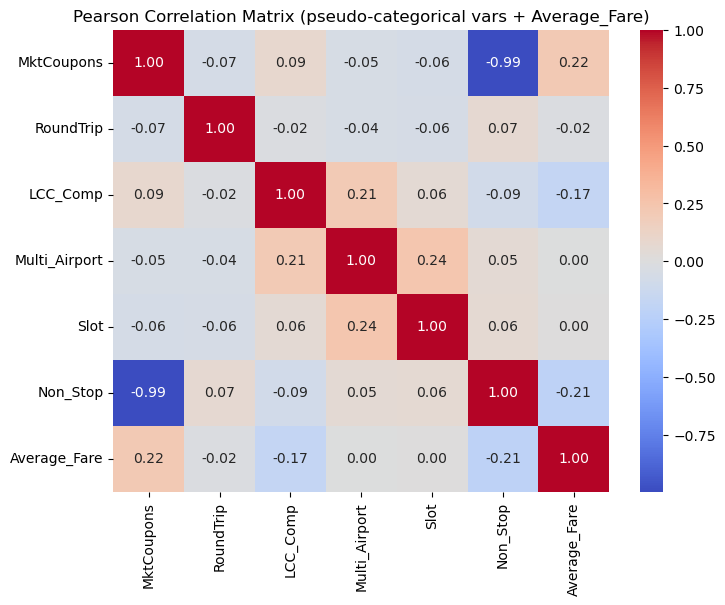

In [ ]:

cols_for_corr = pseudo_categorical_cols + ['Average_Fare']

corr_matrix_pseudo = df[cols_for_corr].corr()

print("Pearson correlation matrix for pseudo-categorical variables with Average_Fare:\n", corr_matrix_pseudo)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_pseudo, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Pearson Correlation Matrix (pseudo-categorical vars + Average_Fare)")
plt.show()


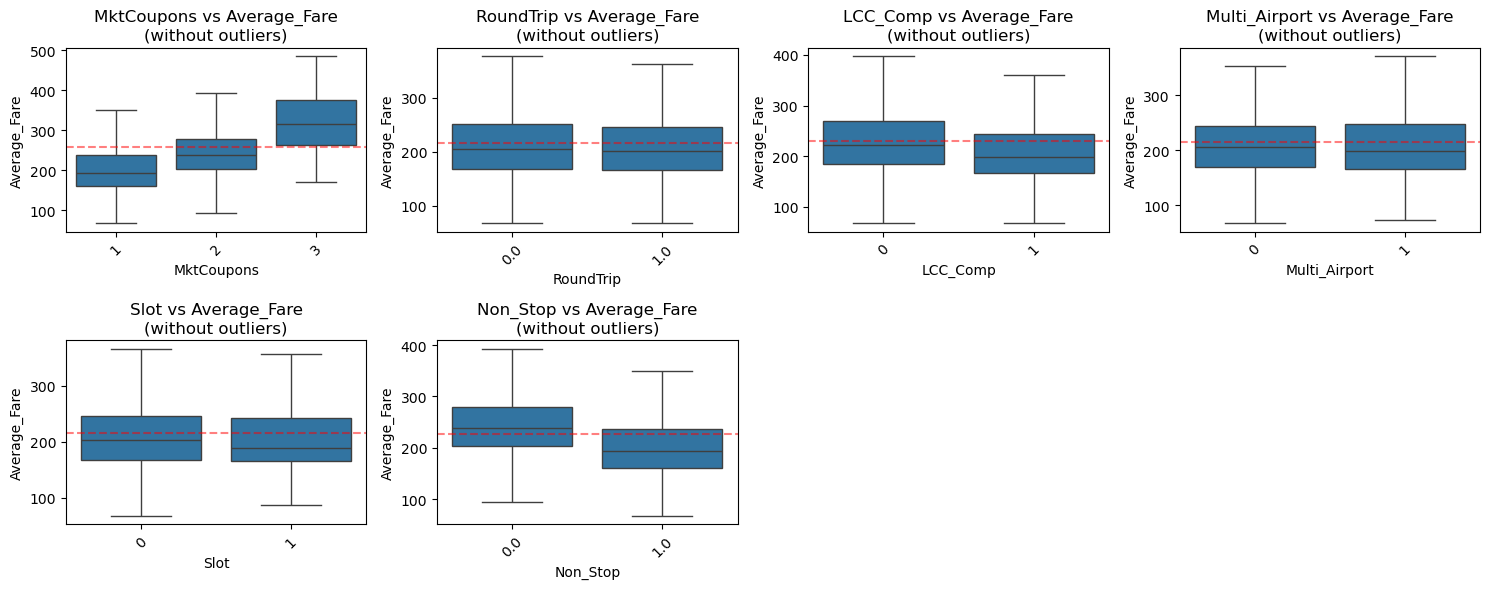

In [40]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(pseudo_categorical_cols):
    plt.subplot(2, len(pseudo_categorical_cols)//2 + 1, i+1)
    
    sns.boxplot(data=df, x=col, y='Average_Fare', showfliers=False)

    means = df.groupby(col)['Average_Fare'].mean()
    plt.axhline(y=means.mean(), color='red', linestyle='--', alpha=0.5)
    
    plt.title(f'{col} vs Average_Fare\n(without outliers)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


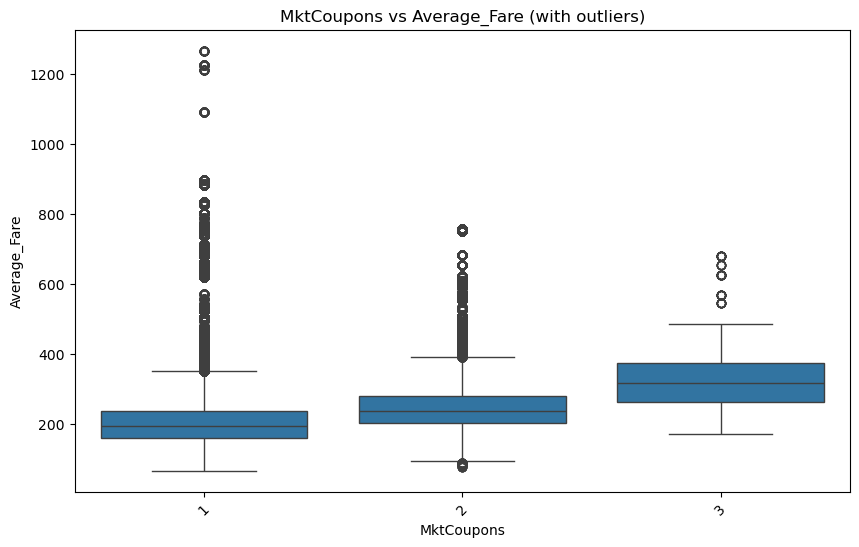

              count    mean  median     min      max
MktCoupons                                          
1           1299905  207.18  193.65   67.39  1265.99
2            278965  247.60  238.07   76.78   756.50
3              2408  321.80  316.35  170.64   678.73


In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MktCoupons', y='Average_Fare')
plt.title('MktCoupons vs Average_Fare (with outliers)')
plt.xticks(rotation=45)
plt.show()

stats = df.groupby('MktCoupons')['Average_Fare'].agg(['count', 'mean', 'median', 'min', 'max']).round(2)
print(stats)


# First analysis

## Average fare vs Miles